====================================================================================================

# **Deep Learning for Classical Japanese Literature**

====================================================================================================

# **Abstract**

Machine Learning has skyrocketed in popularity during recent years, becoming the most successful sector in AI technology. Its ability to handle large and complex datasets trains the model to come up with rules for automating certain tasks. **Deep Learning** is a specific subfield of machine learning which is inspired from our understanding of the human brain, it is a mathematical framework for learning representations from data via models called Neural Networks. 

**Neural Networks**; inspired by neurobiology, are structured in multiple layers of interconnected nodes(also known as a neurons) stacked on top of each other. These nodes are responsible for processing and transforming information through the network. After  several iterations(or epochs), the network is able to recognize patterns in the data and make predictions based on these patterns. We are still presently studying the full extent of what deep learning is capable of, so why not explore problems of historical or cultural relevance to show what deep learning can achieve in this coursework?

# **Introduction**

Historical documents gives us a window into the past, we are able to glimpse at the world before our time; admire its culture, norms and values reflected against our own. The history of Japan is long, unique, and filled with as many conflicts as there were romances, some remained to be undeciphered till this day. Historically, Japan was isolated from the West it was until the Meiji restoration in 1868, where Japanese leaders reformed its education system in attempt to modernize and keep up with the industrial revolution. Due to this sudden modernization, drastic changes were made to the Japanese education system such as the ancient cursive ***Kuzushiji*** script no longer being taught in any school curriculum. This led to ***Kuzushiji*** slowly being forgotten, despite the fact that it has been practiced over a 1000 years. The current generation finds difficulty in understanding books which are written over 150 years ago [1,2].

<table><tr><td><img src='http://dh.japanese-history.org/wp-content/uploads/2021/08/Wakoku-hyakujo-scaled.jpg' style='width:400px'></td><td><img src='https://auctions.c.yimg.jp/images.auctions.yahoo.co.jp/image/dr000/auc0401/users/39d4e55f8a3837ad167c62d59f092867c7864230/i-img600x545-1674469523ucanhj3934.jpg' style='width:400px'></td></tr><tr><td style='text-align:center'>Figure 1. A book about woman studying in universities in the Edo period,<br> Onna Daigaku published in 1772</td><td style='text-align:center'>Figure 2. A textbook after the standardization of Japanese published in 1900,<br> Shinpen Shushinkyouten Vol.3</td></tr></table>

The Figures above shows the difference between texts printed in 1772 and one printed after the Meiji reform, notice how the more frequent a character is written, the more it "distorts" into unintelligible scribbles. Compared to modern Hiragana, the cursive style of Kuzushiji is replaced by a uniform and simplified alphabet system in lieu of more comprehensible texts.

According to the General Catalog of National Books [3] there have been over 1.7 million books written or published in Japan prior to 1867. In addition to the number of registered books in the national catalog, estimated in total there are over a billion historical documents preserved nationwide left untranslated. All of the valuable knowledge, culture and history left contained within these artifacts remains inaccessible to the general public. Only a small percentage of people with extensive training is able to understand and translate these scripts into modern texts. However against the immense volume of data, their work comparible to a drop in the ocean. 

<table><tr><td>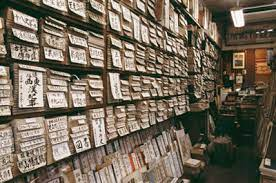</td></tr><tr><td style='text-align:center'>Figure 3. Bookstore providing manuscripts from the Edo period, ancient maps & Ukiyo-e prints, Ohya Shobo bookstore in Jimbocho located in Tokyo JapanT</td></tr></table>

In this project, I aim to introduce machine learning into the field of Classic Japanese Literature with the help of Kuzushiji-MNIST dataset. My goal is to train a model using deep learning that could transcribe Kuzushiji texts with great accuracy. The biggest limiting factor when performing an in-depth analysis of Kuzushiji style would be the data quanlity and quantity of the dataset. Therefore for this assignment, I will be using the smaller and condensed version of Kuzushiji-MNIST dataset rather than Kuzushiji-49 or the larger but unbalanced Kuzushiji-Kanji.

## Data Quantity

The dataset may not contain every character of Kuzushiji that exist, the vocabulary is limited since majority of historical texts are not translated due to the sheer volume that accumulated over a millennium. 

## Data Quality

Kuzishiji-MNIST is similar in its format to the original tensorflow MNIST but is a harder classification task because of the multiple variations of each character. The other datasets include more classes and are based on the frequency in which characters appear in the books, and some of the classes include only a few samples.

# **Kuzushiji Dataset**

For this coursework, I will be using a TensorFlow dataset called Kuzushiji-MNIST, a drop-in replacement for the MNIST dataset(28x28 grayscale, 70 000 images)[4] different from the ones mentioned in the Coursework Instructions provided (MNIST, Reuters, IMDB and Boston Housing Price). From this dataset, I will create a model that could recognise the Kuzushiji texts from the image provided and predict the modern Japanese script it belongs to.

Since MNIST restricts to 10 classes, I have to choose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST. For example, shown in Figure 4, there are different ways that a character can be represented with slight variation in handwriting. In addition, the dataset is a multiclass, single label classification which means that the last layer activation would be done using SoftMax and the loss function will be calculated using 'categorical-crossentropy'.

<table><tr><td>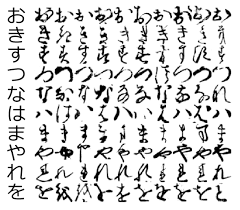</td></tr><tr><td style='text-align:center'>Figure 4: The 10 classes of Kuzushiji-MNIST</td></tr></table>

In [1]:
pip install extra_keras_datasets

Note: you may need to restart the kernel to use updated packages.


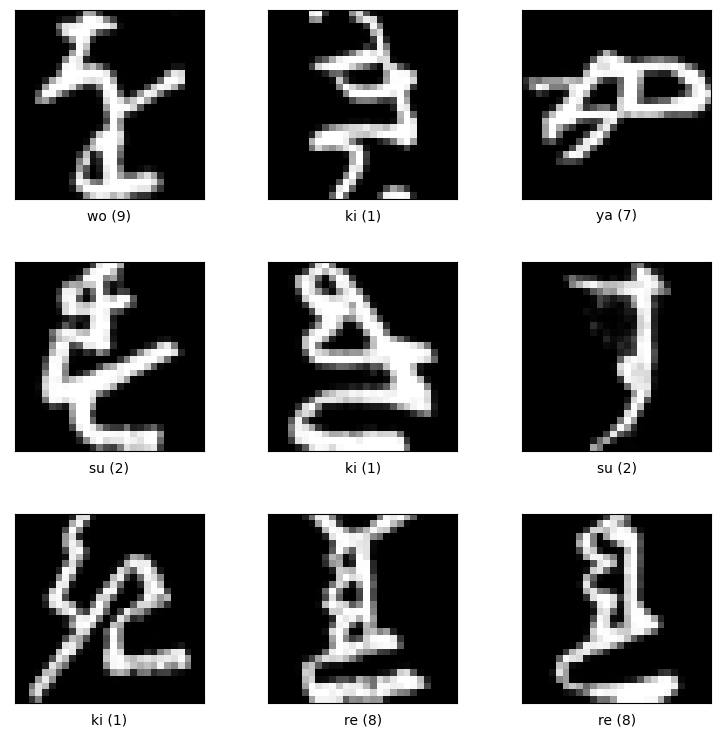

In [2]:
import tensorflow_datasets as tfds
dataset, ds_info = tfds.load('kmnist', split = 'train', with_info=True)
fig = tfds.show_examples(dataset,ds_info)

In [3]:
# Set up matplotlib, pandas,numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

#Using extra-keras-datasets is a extension of tensorflow.keras.datasets 
#with more supported datasets included
from extra_keras_datasets import kmnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
#import Sequential from the keras models module
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import f1_score,cohen_kappa_score
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

It is vital to install all the essential packages and libraries in order for the model to operate as intended.The Tensorflow library is necessary for my project as it provides a collection of ready-to-use pre-seperated training and testing datasets.

## Split into train, test, and evaluation sets

As we would be training the model with training and validation sets, we would need to further split the dataset into training, validation and test sets in a ration of 3:1:1.

In [4]:
DATASET_SIZE = 70000
TRAIN_RATIO = 0.6
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.2

(x_train, y_train), (x_test, y_test) = kmnist.load_data(type='kmnist')
X = np.concatenate([x_train,x_test])
y = np.concatenate([y_train,y_test])

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val,y_test = train_test_split(X_val,y_val,test_size = TEST_RATIO/(TEST_RATIO+VALIDATION_RATIO))

Below shows the split of the kmnist dataset between images and labels. We would need to pre-process the data to ensure that they can be fed into the model.

In [5]:
print("kmnist_train_img: ", X_train.shape)
print("kmnist_train_labels: ", y_train.shape)
print("kmnist_val_img: ", X_val.shape)
print("kmnist_val_labels: ", y_val.shape)
print("kmnist_test_img: ", X_test.shape)
print("kmnist_test_labels: ", y_test.shape)

kmnist_train_img:  (42000, 28, 28)
kmnist_train_labels:  (42000,)
kmnist_val_img:  (14000, 28, 28)
kmnist_val_labels:  (14000,)
kmnist_test_img:  (14000, 28, 28)
kmnist_test_labels:  (14000,)


# **First Baseline**

Before preparing the data, we will be generating our first baseline based on informed guesswork with the data available to us currently. Our baseline data model will predict solely according to the most populated label/class on the dataset, which is 9(wo) and using the label against the test data to get a probability of accurate prediction. This gives us a result where the probability of the test data is also in class 9(wo) is **2.16% as shown below**. In addition, the cell below generates the number of samples per label/class demonstrating that there are equal numbers of samples per label/class, which we will be using to provide further explanation below.

In [6]:
totals_train = np.zeros(10)
totals_test = np.zeros(10)

total_y_train = np.concatenate([y_train, y_val])

for i in range(len(total_y_train)):
  totals_train[total_y_train[i]]+=1

for i in range(len(y_test)):
  totals_test[y_test[i]]+=1

print("The Number of samples per label/class in training set:", totals_train)
print("The Number of samples per label/class in test set:", totals_test)
index = np.argmax(totals_train)
hits = totals_test[index]

hit_rate = hits/np.sum(y_test)
print("The most Freq label: ", index)
print("The percentage probability of accuracy of the current baseline model: ",(hit_rate*100))

The Number of samples per label/class in training set: [5633. 5611. 5582. 5592. 5616. 5573. 5623. 5615. 5596. 5559.]
The Number of samples per label/class in test set: [1367. 1389. 1418. 1408. 1384. 1427. 1377. 1385. 1404. 1441.]
The most Freq label:  0
The percentage probability of accuracy of the current baseline model:  2.1603084800404564


This is the first baseline that is calculated using the high occurrence of the dataset and is highly dependent on how the dataset is split, another baseline example with a 10% split will be explored in the following report.

# **Preparing the data**

In order to prepare the data for the model we need to undergo the following 3 steps:

## Step 1.

The data has to be **'reshaped'** to a form that is acceptable to the model, the goal is to flatten the 28x28(2D array) into vectors(1D array) of floating point values.

## Step 2.

The integers are cast as floats and rescale to lie between [0,1]

In [7]:
#reshape flattens 28 x 28 array to a vector of 784 elements
X_train = X_train.reshape(42000, 28*28)
X_test = X_test.reshape(14000, 28*28)
X_val = X_val.reshape(14000, 28*28)

#cast as floats and rescale from [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_val = X_val.astype('float32')/255

## Step 3.

### **One-Hot Encoding**

Next, the model would require categorically encoded labels where each label will be turned into a 10 element vector with a single 'hot' nonzero entry. This is referred as one-hot encoding. Where the position of the vector corresponds to the label will be encoded.

In [8]:
#encode with the convenient to_catergorical function
from tensorflow.keras.utils import to_categorical

#origin_label = test_labels[0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

The shape of the processed data to be utilized in the model is shown below.

In [9]:
print("kmnist_train_img", X_train.shape)
print("kmnist_train_labels", y_train.shape)
print("kmnist_test_img", X_test.shape)
print("kmnist_test_labels", y_test.shape)
print("kmnist_val_img", X_val.shape)
print("kmnist_val_img", y_val.shape)

kmnist_train_img (42000, 784)
kmnist_train_labels (42000, 10)
kmnist_test_img (14000, 784)
kmnist_test_labels (14000, 10)
kmnist_val_img (14000, 784)
kmnist_val_img (14000, 10)


# Optimizer

I will be using ADAM a variant of Stochastic Gradient Descent algorithm as our optimizer for this project to reduce loss over many training loops and improve the network prediction. Adam works very well in training deep learning models and actually outperforms other Adaptive techniques.

# Loss VS Accuracy

I created two functions as shown below for plotting loss and accuracy operations later in the project. This is because we would be analysing both graphs to ensure that the model is performing as accurately as possible. 

We will be using accuracy as our primary metric at compilation, which is useful since we have same amount of sample per label(refer to first baseline). This is because accuracy is affected by the number of samples available. However, since we split the data into three sets, the number of samples per label/class is no longer the same. As a result, the accuracy will solely reflect on the classifier's performance at guessing. 

Hence, I would need to plot both accuracy and loss graphs when building our model to ensure that it is underfit/overfit/goodfit.

In [10]:
def plot_loss(loss, val_loss):
  '''Plot training loss and validation loss
  input parameters: loss and val_loss'''
  plt.clf()#Remove any existing figures
  epochs = range(1, len(loss)+1)# get number of epochs
  #assign values for each axis
  plt.plot(epochs, loss, 'bo', label = "Loss")
  plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
  #set a title of graph and label of each axis
  plt.title("Training Loss & Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

In [11]:
def plot_accuracy(acc, val_acc):
  '''Plot the training accuracy and validation accuracy'''
  plt.clf()#Remove any existing figures
  epochs = range(1, len(acc)+1)#get number of epochs
  #assign values for each axis
  plt.plot(epochs, acc, 'bo', label = "Accuracy")
  plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
  #Set the title of graph and label of each axis
  plt.title("Training Accuracy & Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

# **Second Baseline**

We have a first example of the above baseline at **2.16% accuracy** ; now we will determine what is the baseline without referencing the dataset but simply looking at the labels/classes present in it. 

As there are a total of 10 labels, each class to represent each of the 10 rows of Hiragana. By the chances of probability the accuracy of each Hiragana class is 100%/10 = **10%**, as such the **second baseline will be 10%** . Since my second baseline is higher than the first baseline, which is 2.16%, the project will use the higher baseline to generate better results. Hence, the benchmark would be to develop a model with a higher accuracy than 10% in order to achieve statistical power.

## Evaluation Method 1: Hold Out Validation

### **Underfit Model**

I will start by using the hold-out validation method to create our models. The first model would be fairly simple, only having the minimum requirements that we would need to satisfy 10% or higher accuracy. The model will only contain the necessary last activation layer **softmax** and the loss function **categorical_crossentropy**.

In [12]:
#Empty network
underfit_model = models.Sequential()
underfit_model.add(layers.Dense(10, activation= 'softmax'))

In [13]:
#Optimizer, Loss and metrics are choose at compilation
underfit_model.compile (optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

In [14]:
#Training - fit to input data
results1 = underfit_model.fit(X_train,y_train, epochs = 10, batch_size = 128, validation_data=(X_test,y_test),verbose=0)

In [15]:
#Display Summary
underfit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


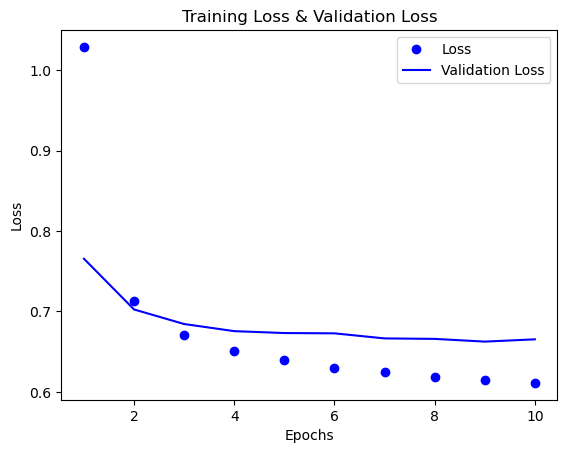

In [16]:
plot_loss(results1.history['loss'], results1.history['val_loss'])

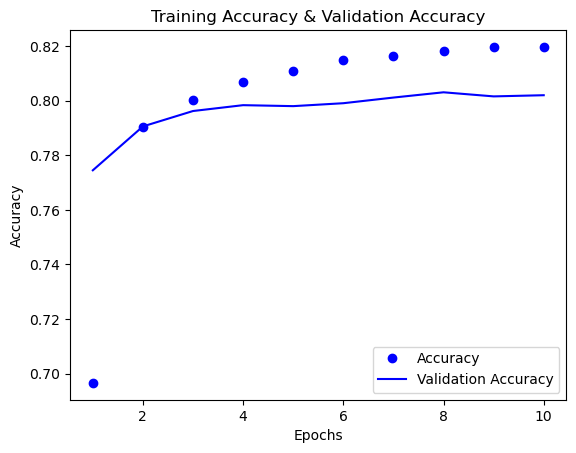

In [17]:
plot_accuracy(results1.history['accuracy'],results1.history['val_accuracy'])

In [18]:
test_loss,test_acc = underfit_model.evaluate(X_val,y_val)

438/438 [==============================] - 0s 993us/step - loss: 0.6634 - accuracy: 0.8006


As shown above, we have reached an accuracy of 80% despite underfitting our model. This is well above the 10% baseline and now we will create a model that overfits.

### **Scaling up: developing a model that overfits**

Now we need to create a model that overfits, with aim to find a model that stands in perfect balance between overfitting and underfitting. To create a overfit model, we need to decrease the number of training data until the model's performance on the validation data starts degrading.

In [19]:
#Empty Network
overfit_network = models.Sequential()
#Add 4 layers
overfit_network.add(layers.Dense(512,activation = 'relu', input_shape=(28*28,))) 
overfit_network.add(layers.Dense(124,activation = 'relu'))
overfit_network.add(layers.Dense(46,activation = 'relu')) 
overfit_network.add(layers.Dense(10,activation = 'softmax')) 

In [20]:
#Optimizer, Loss and metrics are choose at compilation
overfit_network.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Training - fit to input data
results2 = overfit_network.fit(X_train,y_train, epochs = 40, batch_size = 64,validation_data=(X_test,y_test), verbose=0)

In [22]:
overfit_network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 124)               63612     
                                                                 
 dense_3 (Dense)             (None, 46)                5750      
                                                                 
 dense_4 (Dense)             (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-trainable params: 0
_________________________________________________________________


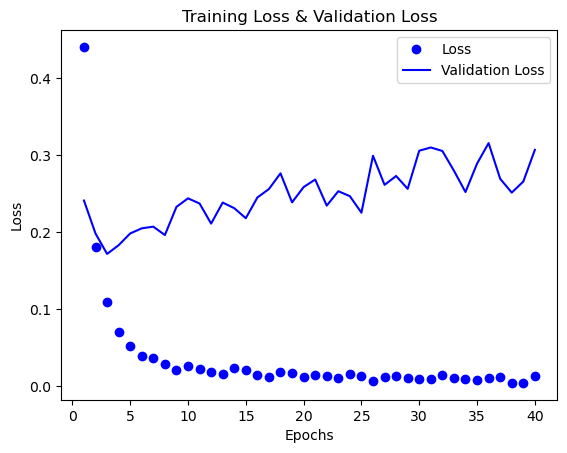

In [23]:
plot_loss(results2.history['loss'], results2.history['val_loss'])

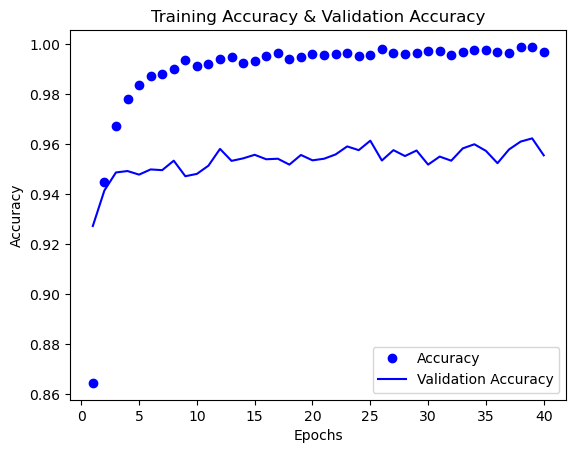

In [24]:
plot_accuracy(results2.history['accuracy'],results2.history['val_accuracy'])

In [25]:
test_loss,test_acc = overfit_network.evaluate(X_val,y_val)

438/438 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.9533


From the graph above, we can see that the accuracy of the overfitted model is higher than the underfit model at 95%. However, we also see a huge difference between training and validation accuracy.

### Regularizing the Model

After creating a model that overfits, we need to regularize the model as to discourage the complexity of the model and avoid overfitting in the future so as to achieve a perfect balance for the model.

This can be accomplished via a number of methods that we will be exploring below:

#### **Method 1 - DropOut**

In [26]:
#Empty Network
model_1 = models.Sequential()
#adding layers
model_1.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
#Use Dropout
model_1.add(layers.Dropout(0.7))
model_1.add(layers.Dense(124, activation = 'relu'))
model_1.add(layers.Dense(46, activation = 'relu'))
model_1.add(layers.Dropout(0.7))
model_1.add(layers.Dense(10, activation = 'softmax'))

In [27]:
#Optimizer, Loss and metrics are choose at compilation
model_1.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [28]:
#Training - fit to input data
fit_1 = model_1.fit(X_train,y_train, epochs = 40, batch_size = 128, validation_data=(X_test,y_test),verbose=0)

In [29]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 124)               63612     
                                                                 
 dense_7 (Dense)             (None, 46)                5750      
                                                                 
 dropout_1 (Dropout)         (None, 46)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-tr

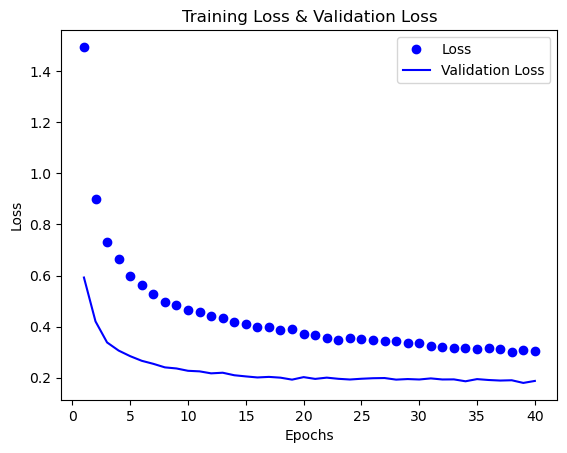

In [30]:
plot_loss(fit_1.history['loss'], fit_1.history['val_loss'])

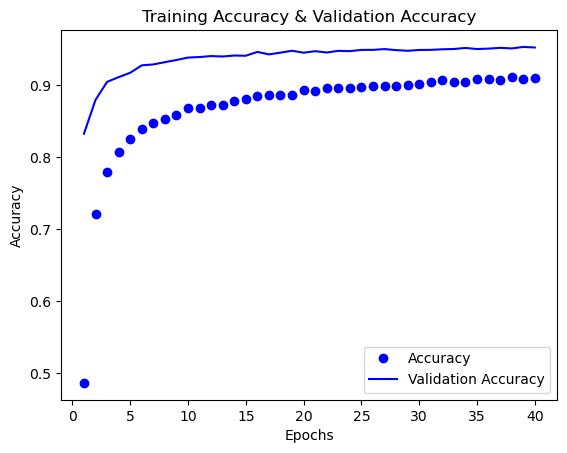

In [31]:
plot_accuracy(fit_1.history['accuracy'],fit_1.history['val_accuracy'])

In [32]:
test_loss, test_acc = model_1.evaluate(X_val,y_val)

438/438 [==============================] - 1s 2ms/step - loss: 0.1941 - accuracy: 0.9544


#### **Method 2 - Using L1 and/or L2 Regularization**

In [33]:
#Empty Network
model_2 = models.Sequential()
#adding layers
model_2.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model_2.add(layers.Dense(124, kernel_regularizer = regularizers.l1(0.01),input_shape=(10000,), activation = 'relu'))
model_2.add(layers.Dense(46, kernel_regularizer = regularizers.l2(0.01),activation = 'relu'))
model_2.add(layers.Dense(10, activation = 'softmax'))

In [34]:
#Optimizer, Loss and metrics are choose at compilation
model_2.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#Training - fit to input data
fit_2 = model_2.fit(X_train,y_train, epochs = 40, batch_size = 128, validation_data=(X_test,y_test),verbose=0)

In [36]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 124)               63612     
                                                                 
 dense_11 (Dense)            (None, 46)                5750      
                                                                 
 dense_12 (Dense)            (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-trainable params: 0
_________________________________________________________________


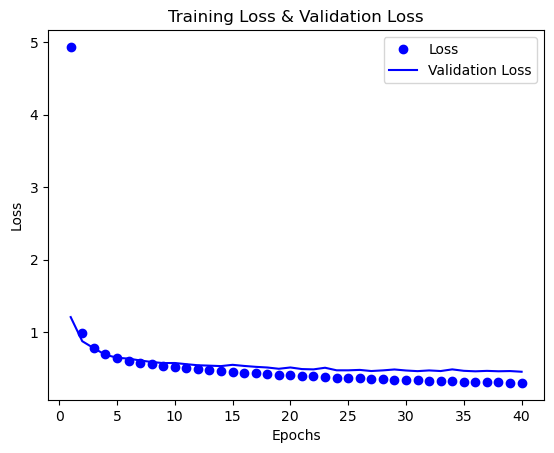

In [37]:
plot_loss(fit_2.history['loss'],fit_2.history['val_loss'])

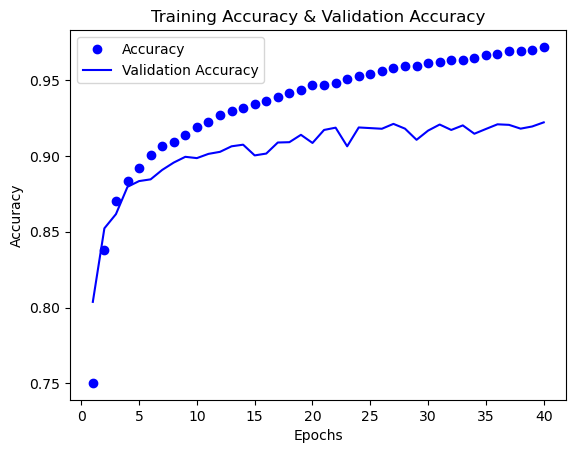

In [38]:
plot_accuracy(fit_2.history['accuracy'], fit_2.history['val_accuracy'])

In [39]:
test_loss, test_acc = model_2.evaluate(X_val,y_val)

438/438 [==============================] - 1s 2ms/step - loss: 0.4621 - accuracy: 0.9223


#### **Combining the 2 methods**

In [40]:
#Empty Network
model_3 = models.Sequential()
#adding layers
model_3.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model_3.add(layers.Dropout(0.7))
model_3.add(layers.Dense(124, kernel_regularizer = regularizers.l1(0.001),input_shape=(10000,), activation = 'relu'))
model_3.add(layers.Dense(46, activation = 'relu'))
model_3.add(layers.Dense(10, activation = 'softmax'))

In [41]:
#Optimizer, Loss and metrics are choose at compilation
model_3.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [42]:
#Training - fit to input data
fit_3 = model_3.fit(X_train,y_train, epochs = 40, batch_size = 128, validation_data=(X_test,y_test),verbose=0)

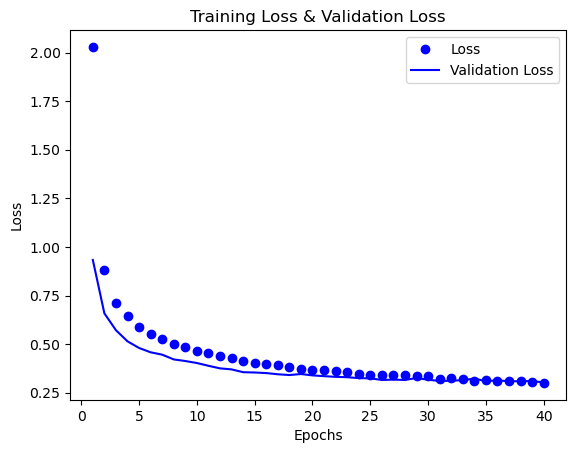

In [43]:
plot_loss(fit_3.history['loss'],fit_3.history['val_loss'])

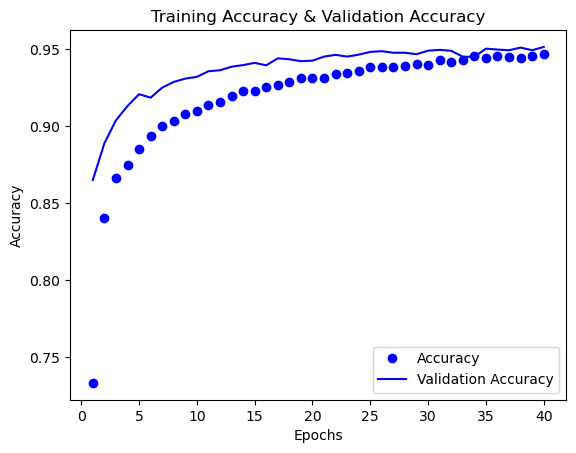

In [44]:
plot_accuracy(fit_3.history['accuracy'], fit_3.history['val_accuracy'])

In [45]:
test_loss, test_acc = model_3.evaluate(X_val,y_val)

438/438 [==============================] - 1s 2ms/step - loss: 0.3022 - accuracy: 0.9503


Judging from the graphs above, we have successfully created a model with a good-fit where the plots are close to each other without overfitting as well as achieving a **high accuracy of 95%**

### **Final Model**

Now that we have created a model of good-fit, we will perform training on the complete set instead of the split set. Hence, we will concatenante both training and validation sets below. 

In [46]:
#Empty Network
last_model = models.Sequential()
#adding layers
last_model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
last_model.add(layers.Dropout(0.7))
last_model.add(layers.Dense(124, kernel_regularizer = regularizers.l1(0.001),input_shape=(10000,), activation = 'relu'))
last_model.add(layers.Dense(46, activation = 'relu'))
last_model.add(layers.Dense(10, activation = 'softmax'))

In [47]:
#Last Optimizer, Loss and metrics are choose at compilation
last_model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Concatenate 
final_fit = last_model.fit(np.concatenate([X_train,X_val]), np.concatenate([y_train, y_val]))

1750/1750 [==============================] - 14s 8ms/step - loss: 1.3507 - accuracy: 0.7763


In [49]:
test_loss, test_acc = last_model.evaluate(X_test,y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.6851 - accuracy: 0.8812


In [50]:
y_pred = last_model.predict(X_test)

y_test = np.argmax(y_test, axis = 1)
Y_pred = np.argmax(y_pred, axis = 1)
# Confusion Matrix
cm = confusion_matrix(y_test,Y_pred)
p = precision_score(y_test, Y_pred, average = 'micro')
r = recall_score(y_test, Y_pred, average = 'micro')
f = f1_score(y_test, Y_pred, average = 'micro')
ck = cohen_kappa_score(y_test, Y_pred)
#Print Scores
print("Precision score is: ", p)
print("Recall score is: ", r)
print("F1 value is: ", f)
print("Cohen Kappa is: ", ck)

438/438 [==============================] - 1s 2ms/step
Precision score is:  0.8812142857142857
Recall score is:  0.8812142857142857
F1 value is:  0.8812142857142858
Cohen Kappa is:  0.8680110723301592


Text(95.72222222222221, 0.5, 'Truth')

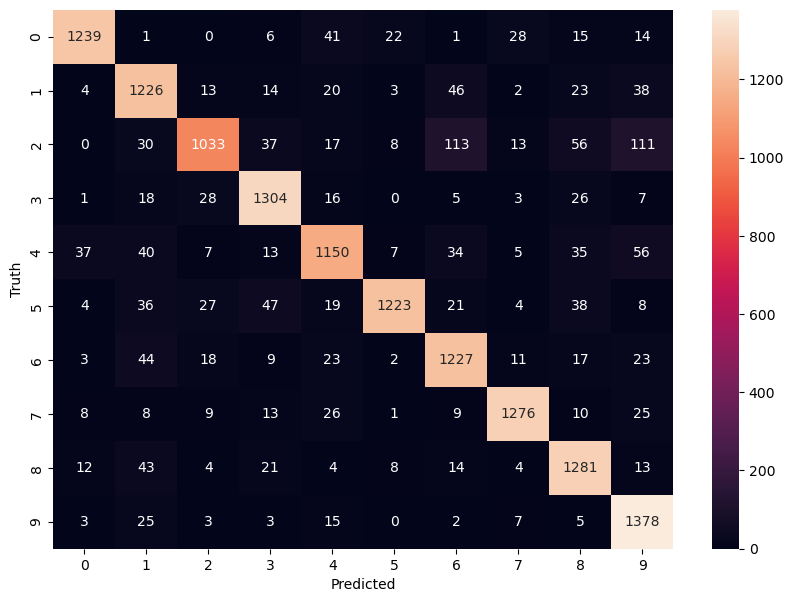

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
#Comparing the prediction and test result
Y_pred[:10]

array([4, 1, 0, 4, 6, 3, 2, 7, 5, 1], dtype=int64)

In [53]:
y_test[:10]

array([4, 1, 0, 6, 6, 3, 2, 8, 5, 1], dtype=int64)

From the evaluation metrics above, we have developed a model that is good-fit and have a **high accuracy rate of 88.12%**. This is evident to the experiment above where we choose the first 10 values predicted by the model and have a remarkable similarity when compared to the actual test data.



## Evaluation Method 2: Iterative K-Fold

Normally, the most common method used is Hold-Out validation however this method is highly dependent on data points within training and testing sets, which in turn is highly reliant on the splitting of dataset into training and test sets. 

Our KMNITS dataset only contains 70,000 samples, the small sample size makes it hard to split, since it will result in small validation points and partial training sets. The small validation points makes it highly sensitive to data point changes on split data.

K-fold validation would be a better choice for evaluating protocols as it reduces the sensitivity of small sets. As a result, iterated K-Fold validation would be our preferred evaluation protocol since it uses smaller data sets while delivering highly accurate model evaluation.

In [54]:
DATASET_SIZE = 70000
TRAIN_RATIO = 0.8
TEST_RATIO = 0.2

(x_train, y_train), (x_test, y_test) = kmnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=(1-TRAIN_RATIO))

In [55]:
print("fm_train_img", X_train.shape)
print("fm_train_labels", y_train.shape)
print("fm_test_img", X_test.shape)
print("fm_test_labels", y_test.shape)

fm_train_img (56000, 28, 28)
fm_train_labels (56000,)
fm_test_img (14000, 28, 28)
fm_test_labels (14000,)


Since we will be doing the splitting of the training set into the partial training and validation set in the K-fold function itself, we do not need to split them at the start.

In [56]:
#Reshape flattens 28x28 array to vector of 784 elements
X_train = X_train.reshape(56000, 28*28)
X_test = X_test.reshape(14000, 28*28)

#Cast as floats and rescale from 0 -1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [57]:
#Encode to_categorical function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
print("fm_train_img", X_train.shape)
print("fm_train_labels", y_train.shape)
print("fm_test_img", X_test.shape)
print("fm_test_labels", y_test.shape)

fm_train_img (56000, 784)
fm_train_labels (56000, 10)
fm_test_img (14000, 784)
fm_test_labels (14000, 10)


In [59]:
def smooth_curve(points, factor = 0.9):
  '''Used to generate a smoother curve'''
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [60]:
def plot_mae(val_mae,num_epochs):
  '''Plot val_mae on gragh'''
  average = [np.mean([x[i] for x in val_mae]) for i in range(num_epochs)]
  smooth_mae = smooth_curve(average)

  plt.plot(range(1,len(average)+1),average)
  plt.xlabel('Epochs')
  plt.ylabel('Validation MAE')
  plt.show()

  plt.plot(range(1,len(smooth_mae)+1),smooth_mae)
  plt.xlabel('Epochs')
  plt.ylabel('Smooth Validation MAE')
  plt.show()
  print("Lowest MAE occurs at epoch", np.argmin(smooth_mae))

### **Iterated K_Fold on Underfit Model**

We will test the effects of K-Fold on various models and compare the accuracy of each. For the segment below, we will be taking a look at K-Fold on a underfit model.

In [61]:
# Empty Network
IK_underfitModel = models.Sequential()
IK_underfitModel.add(layers.Dense(10,activation ='softmax'))
IK_underfitModel.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['mae'])

In [62]:
from sklearn.model_selection import StratifiedKFold

K = 4
num_val_samples = len(X_train)//K
num_epochs = 80
all_val_mae_1 = []
all_val_mse_1 = []

all_mae_1 = []
all_loss_1 = []
all_mae_history_1 = [] 
all_loss_history_1 = [] 

N_iterations = 4
N_folds = 5

for i in range(N_iterations):
  skf = StratifiedKFold(n_splits = N_folds, shuffle = True)
  #K-Fold cross Validation
  for j, (train_index,val_index) in enumerate(skf.split(X_train,y_train.argmax(1))):
    print('Processing Fold', j)
    partial_train_data = X_train[train_index]
    val_data = X_train[val_index]
    partial_train_targets = y_train[train_index]
    val_targets = y_train[val_index]

    #Train the model
    results_1 = IK_underfitModel.fit(partial_train_data,partial_train_targets,
                                    epochs = num_epochs, batch_size = 128, 
                                    validation_data=(X_val,y_val),verbose=0)
    #Evaluate the trained data
    val_mse, val_mae = IK_underfitModel.evaluate(val_data,val_targets,verbose=0)
    all_val_mae_1.append(val_mae)
    all_val_mse_1.append(val_mse)

    mae = results_1.history['mae']
    all_mae_1.append(mae)
    mae_history = results_1.history['val_mae']
    all_mae_history_1.append(mae_history)

    loss = results_1.history['loss']
    all_loss_1.append(loss)
    loss_history = results_1.history['val_loss']
    all_loss_history_1.append(loss_history)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


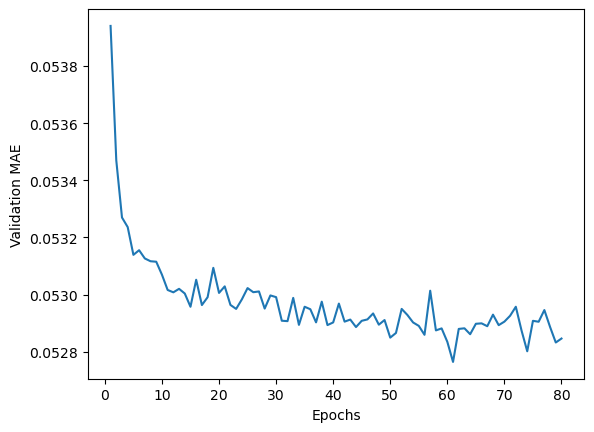

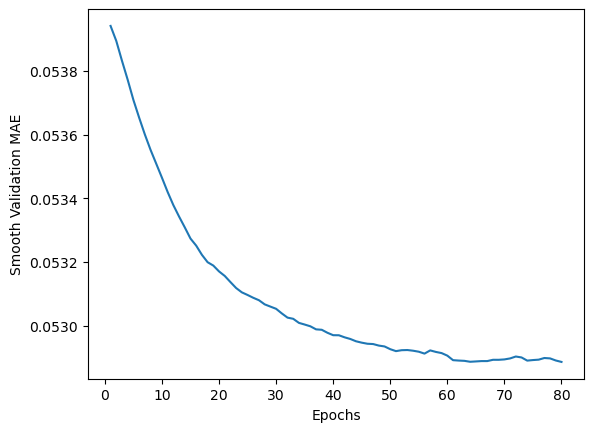

Lowest MAE occurs at epoch 79


In [63]:
plot_mae(all_mae_history_1, num_epochs)

### **Iterated K-Fold on Overfit Model**

Now we will perform iterated K-fold validation on a overfit model:

In [64]:
#Empty network
IK_overfitModel = models.Sequential()
IK_overfitModel.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
IK_overfitModel.add(layers.Dense(124, activation='relu'))
IK_overfitModel.add(layers.Dense(46, activation='relu'))
IK_overfitModel.add(layers.Dense(10, activation='softmax'))
#Optimizer,metrics
IK_overfitModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['mae'])

In [65]:
from sklearn.model_selection import StratifiedKFold

K = 4
num_val_samples = len(X_train)//K
num_epochs = 80
all_val_mae_2 = []
all_val_mse_2 = []

all_mae_2 = []
all_loss_2 = []
all_mae_history_2 = [] 
all_loss_history_2 = [] 

N_iterations = 4
N_folds = 5

for i in range(N_iterations):
  skf = StratifiedKFold(n_splits = N_folds, shuffle = True)
  #K-Fold cross Validation
  for j, (train_index,val_index) in enumerate(skf.split(X_train,y_train.argmax(1))):
    print('Processing Fold', j)
    partial_train_data = X_train[train_index]
    val_data = X_train[val_index]
    partial_train_targets = y_train[train_index]
    val_targets = y_train[val_index]

    #Train the model
    results_2 = IK_overfitModel.fit(partial_train_data,partial_train_targets,
                                    epochs = num_epochs, batch_size = 150, 
                                    validation_data=(X_test,y_test),verbose=0)
    #Evaluate the trained data
    val_mse, val_mae = IK_overfitModel.evaluate(val_data,val_targets, verbose=0)
    all_val_mae_2.append(val_mae)
    all_val_mse_2.append(val_mse)

    mae = results_2.history['mae']
    all_mae_2.append(mae)
    mae_history = results_2.history['val_mae']
    all_mae_history_2.append(mae_history)

    loss = results_2.history['loss']
    all_loss_2.append(loss)
    loss_history = results_2.history['val_loss']
    all_loss_history_2.append(loss_history)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


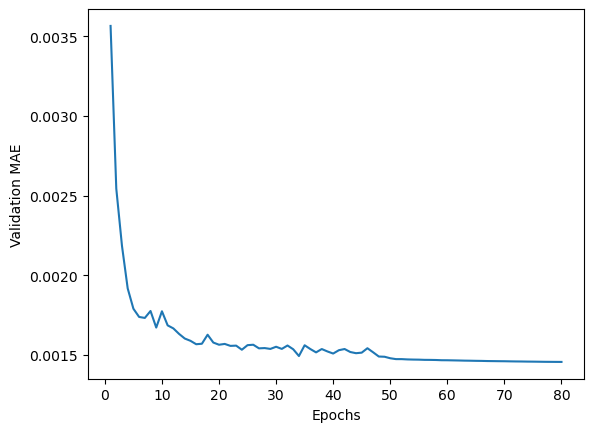

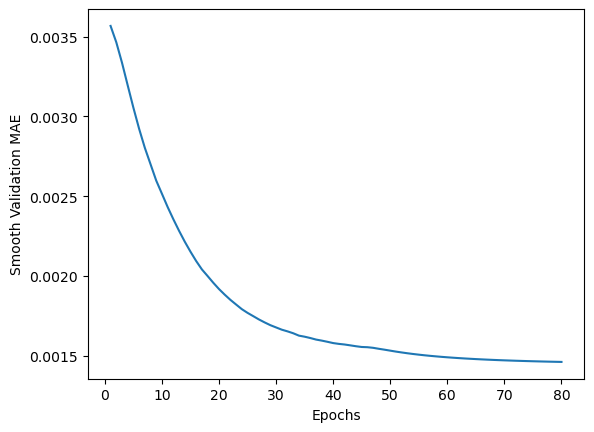

Lowest MAE occurs at epoch 79


In [66]:
plot_mae(all_mae_history_2, num_epochs)

### **Iterated K-Fold on Good-Fit Model**

We will now develop the model on all training sets instead of partial sets:

In [67]:
#Empty network
IK_goodfitModel = models.Sequential()
IK_goodfitModel.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
IK_goodfitModel.add(layers.Dense(124, activation='relu'))
IK_goodfitModel.add(layers.Dense(46, activation='relu'))
IK_goodfitModel.add(layers.Dense(10, activation='softmax'))
#Optimizer,metrics
IK_goodfitModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['mae'])

In [68]:
from sklearn.model_selection import StratifiedKFold

K = 4
num_val_samples = len(X_train)//K
num_epochs = 27
all_val_mae_3 = []
all_val_mse_3 = []

all_mae_3 = []
all_loss_3 = []
all_mae_history_3 = [] 
all_loss_history_3 = [] 

N_iterations = 4
N_folds = 5

for i in range(N_iterations):
  skf = StratifiedKFold(n_splits = N_folds, shuffle = True)
  #K-Fold cross Validation
  for j, (train_index,val_index) in enumerate(skf.split(X_train,y_train.argmax(1))):
    print('Processing Fold', j)
    partial_train_data = X_train[train_index]
    val_data = X_train[val_index]
    partial_train_targets = y_train[train_index]
    val_targets = y_train[val_index]

    #Train the model
    IK_goodfitModel.fit(np.concatenate([partial_train_data,val_data]),np.concatenate([partial_train_targets, val_targets]),verbose=0)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [69]:
test_loss,test_acc = IK_goodfitModel.evaluate(X_test,y_test)

438/438 [==============================] - 1s 3ms/step - loss: 0.2472 - mae: 0.0083


The accuracy of a Iterated K-fold validation on a Good-fit model is 100-(maex100)% = (100 - 0.83)% = **99.17%**

# **Conclusion**

In conclusion, I have created 2 distinct models that are able to exceed the baseline. Both models uses different evaluation protocols but share similar layers where; 'hold-out validation' is used for regularising the model, 'dropouts' and 'K-Fold validation' are required for lesser epochs. 

The result is even when using different evaluation methods, the general outline of the 2 models are similar as shown above. The only exception being that hold-out method is affected by the splitting of data.The models are able to generate decent results and obtain high accuracy scores. Hold-out validation managed to get a **88.12% accuracy** score whereas, iterated k-folds achieved a **99.17% accuracy.** So with the above results, we can clearly see that accuracy of Iterative K-Fold is better than that by the Holdout method.

As such, for the KMNIST dataset it is prefered to use Iterative K-fold to predict Kuzushiji character with higher accuracy.

# **References**

[1] Y. Hashimoto, Y. Iikura, Y. Hisada, S. Kang, T. Arisawa, and D. Kobayashi-Better. The Kuzushiji Project: Developing a Mobile Learning Application for Reading Early Modern Japanese Texts. DHQ: Digital Humanities Quarterly, 11(1), 2017. http://dh2016.adho.org/static/data/254.html.

[2] K. Takashiro. Notation of the Japanese Syllabary seen in the Textbook of the Meiji first Year. The bulletin of Jissen Women’s Junior College, 34:109–119, mar 2013. https://ci.nii.ac.jp/els/contents110009587135.pdf?id=ART0010042265.

[Figure 1.]E. Kaibara. Onna Daigaku. Shinsaibashijunkeicho, 1772.http://www.wul.waseda.ac.jp/kotenseki/html/bunko30/bunko30_g0371/index.html

[Figure 2.]Fukyusha. Shinpen Shushinkyouten Vol.3 . Fukyusha, 1900.

[3] I. Shoten. General Catalog of National Books. Iwanami Shoten, 2002.

[Figure 3.]Chiyoda, A. (n.d.). Jimbocho Used Bookstore Street. Available at: Chiyoda,Association (n.d.). Jimbocho Used Bookstore Street. Available at: https://visit-chiyoda.tokyo/app/en/spot/detail/50 [Accessed 18 Feb. 2023]. ‌[Accessed 18 Feb. 2023].

[Figure 4]Mishra, P. (2018). Deep Learning for Classical Japanese Literature. Available at: https://github.com/rois-codh/kmnist [Accessed 20 Feb. 2023].

[Dataset obtained from] Clanuwat, T., Bober-Irizar, M. and Kitamoto, A. (2018). Deep Learning for Classical Japanese Literature. [TensorFlow] Available at: https://www.tensorflow.org/datasets/catalog/kmnist[Accessed 10 Feb. 2023].

[4]Williams,K.(2019).DataCamp. Retrieved 10 February 2023, from:
https://www.datacamp.com/tutorial/deep-learning-python

[5]Rastogi,S.(2021).K-Fold|K-Fold Averaging on Deep Learning Classifier. Analytics Vidhya, from https://www.analyticsvidhya.com/blog/2021/09/how-to-apply-k-fold-averaging-on-deep-learning-classifier/ [Accessed on 25 Feb 2023]

[6]Wirth,P. Which Optimizer should I use for my ML Project? Lightly.ai,from https://www.lightly.ai/post/which-optimizer-should-i-use-for-my-machine-learning-project [Accessed on 25 Feb 2023]